<a href="https://colab.research.google.com/github/deebachowdhury/Assignments-/blob/main/Shanto_Saha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def get_risk(bmi_category, smoking_status, alcohol_status, activity_status):
    # Define the risk matrix as a dictionary for quick lookup
    risk_matrix = {
        ('Underweight', 'Non-smoker', 'Non-drinker', 'Inactive'): 'Medium',
        ('Underweight', 'Non-smoker', 'Non-drinker', 'Active'): 'Low',
        # Add all other combinations from the provided table
        # ...
        ('Obesity', 'Smoker', 'Drinker', 'Active'): 'High'
    }
    return risk_matrix.get((bmi_category, smoking_status, alcohol_status, activity_status), 'Unknown')

In [22]:
def calculate_bmi(height, weight):
    height_m = height / 100
    bmi = weight / (height_m ** 2)
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

def get_user_input():
    height = float(input("Enter height in cm: "))
    weight = float(input("Enter weight in kg: "))
    smoking_status = input("Smoking status (Non-smoker/Smoker): ")
    alcohol_status = input("Alcohol consumption status (Non-drinker/Drinker): ")
    activity_status = input("Physical activity status (Inactive/Active): ")
    bmi_category = calculate_bmi(height, weight)
    risk = get_risk(bmi_category, smoking_status, alcohol_status, activity_status)

    return {
        'Height': height,
        'Weight': weight,
        'BMI Category': bmi_category,
        'Smoking Status': smoking_status,
        'Alcohol Status': alcohol_status,
        'Activity Status': activity_status,
        'Risk': risk
    }

In [23]:
import pandas as pd

# Function to collect data for one patient
def get_user_input():
    age = int(input("Enter your age: "))
    gender = input("Enter your gender (M/F): ").upper()
    height = float(input("Enter your height in meters: "))
    weight = float(input("Enter your weight in kg: "))
    bmi = weight / (height ** 2)

    smoking_status = input("Do you smoke? (yes/no): ").lower()
    alcohol_status = input("Do you drink alcohol? (yes/no): ").lower()
    activity_status = input("Are you physically active? (yes/no): ").lower()

    return {
        'Age': age,
        'Gender': gender,
        'BMI': bmi,
        'Smoking Status': smoking_status,
        'Alcohol Status': alcohol_status,
        'Activity Status': activity_status
    }

# Function to determine heart condition risk
def predict_risk(patient_data):
    bmi = patient_data['BMI']

    if bmi < 18.5:
        bmi_category = "Underweight"
    elif 18.5 <= bmi < 25:
        bmi_category = "Normal weight"
    elif 25 <= bmi < 30:
        bmi_category = "Overweight"
    else:
        bmi_category = "Obesity"

    smoking_status = patient_data['Smoking Status']
    activity_status = patient_data['Activity Status']

    # Basic example of risk determination based on BMI and smoking
    if bmi_category == "Underweight" and smoking_status == "yes":
        risk = "High"
    elif bmi_category == "Normal weight" and activity_status == "yes":
        risk = "Low"
    else:
        risk = "Medium"  # Default risk level, modify as per the risk table

    patient_data['BMI Category'] = bmi_category
    patient_data['Heart Condition Risk'] = risk
    return patient_data

# List to store data of all patients
patients_data = []

# Loop to collect data for multiple patients
while True:
    patient_data = get_user_input()
    patient_data = predict_risk(patient_data)
    patients_data.append(patient_data)

    another = input("Would you like to enter data for another patient? (yes/no): ").lower()
    if another != 'yes':
        break

Enter your age: 21
Enter your gender (M/F): F
Enter your height in meters: 1.56
Enter your weight in kg: 56
Do you smoke? (yes/no): no
Do you drink alcohol? (yes/no): no
Are you physically active? (yes/no): yes
Would you like to enter data for another patient? (yes/no): no


In [24]:
# Convert list of dictionaries to DataFrame and save to CSV
df = pd.DataFrame(patients_data)
df.to_csv('heart_condition_predictions.csv', mode='a', header=False, index=False)

print("All patient data has been saved to CSV.")

All patient data has been saved to CSV.


In [25]:
# Display the data of all patients
print(df)

   Age Gender        BMI Smoking Status Alcohol Status Activity Status  \
0   21      F  23.011177             no             no             yes   

    BMI Category Heart Condition Risk  
0  Normal weight                  Low  


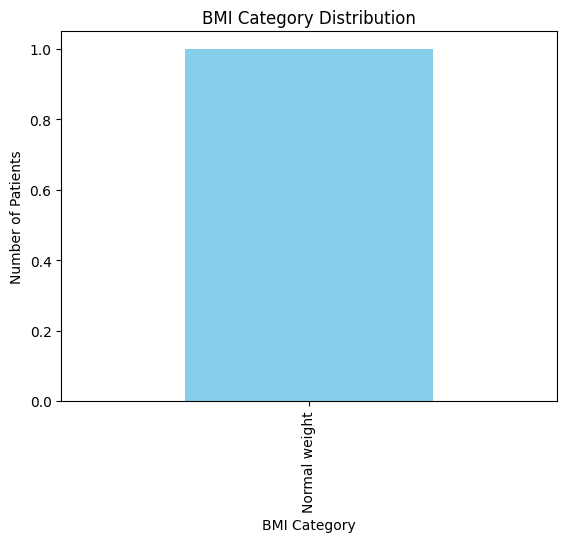

In [26]:
import matplotlib.pyplot as plt

# Plot the distribution of BMI categories
df['BMI Category'].value_counts().plot(kind='bar', title='BMI Category Distribution', color='skyblue')
plt.xlabel('BMI Category')
plt.ylabel('Number of Patients')
plt.show()

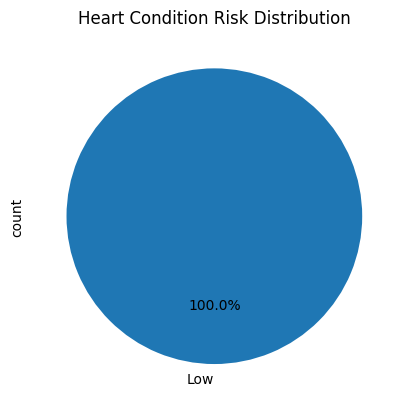

In [27]:
# Plot the distribution of Heart Condition Risk
df['Heart Condition Risk'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Heart Condition Risk Distribution', startangle=90)
plt.show()